In [53]:
using Plots

In [284]:
#target area: 
target = [206 250; -105 -57 ]

#test target area:
#target = [20 30; -10 -5]

2×2 Array{Int64,2}:
  206  250
 -105  -57

In [227]:
possibleVelocitiesTest = reshape([
23,-10 , 25,-9 ,  27,-5 , 29,-6  , 22,-6  , 21,-7  , 9,0    , 27,-7  , 24,-5 ,
25,-7  , 26,-6 ,  25,-5 , 6,8    , 11,-2  , 20,-5  , 29,-10 , 6,3    , 28,-7 ,
8,0    , 30,-6 ,  29,-8 , 20,-10 , 6,7    , 6,4    , 6,1    , 14,-4  , 21,-6 ,
26,-10 , 7,-1  ,  7,7   , 8,-1   , 21,-9  , 6,2    , 20,-7  , 30,-10 , 14,-3 ,
20,-8  , 13,-2 ,  7,3   , 28,-8  , 29,-9  , 15,-3  , 22,-5  , 26,-8  , 25,-8 ,
25,-6  , 15,-4 ,  9,-2  , 15,-2  , 12,-2  , 28,-9  , 12,-3  , 24,-6  , 23,-7 ,
25,-10 , 7,8   ,  11,-3 , 26,-7  , 7,1    , 23,-9  , 6,0    , 22,-10 , 27,-6 ,
8,1    , 22,-8 ,  13,-4 , 7,6    , 28,-6  , 11,-4  , 12,-4  , 26,-9  , 7,4   ,
24,-10 , 23,-8 ,  30,-8 , 7,0    , 9,-1   , 10,-1  , 26,-5  , 22,-9  , 6,5   ,
7,5    , 23,-6 ,  28,-10, 10,-2  , 11,-1  , 20,-9  , 14,-2  , 29,-7  , 13,-3 ,
23,-5  , 24,-8 ,  27,-9 , 30,-7  , 28,-5  , 21,-10 , 7,9    , 6,6    , 21,-5 ,
27,-10 , 7,2   ,  30,-9 , 21,-8  , 22,-7  , 24,-9  , 20,-6  , 6,9    , 29,-5 ,
8,-2   , 27,-8 ,  30,-5 , 24,-7],(2,112))

2×112 Array{Int64,2}:
  23  25  27  29  22  21  9  27  24  25  …  22  24  20  6  29   8  27  30  24
 -10  -9  -5  -6  -6  -7  0  -7  -5  -7     -7  -9  -6  9  -5  -2  -8  -5  -7

## Part 1

In [279]:
function calculateTrajectory(xbeg,vbeg,target)
    x = xbeg
    v = vbeg
    
    apex = x[2]
#     trajectory = Array{Int}(undef,0)
#     steps = 1   
#     append!(trajectory,x)
    
    while (x[1]<target[1,2] && x[2]>target[2,1])
        #if we reached the box, quit loop 
        if (x[1]>=target[1,1]) && (x[2]<=target[2,2])
            break
        end
        
        x += v
        
        if v[1]>0
            v[1] -=1
        elseif v[1]<0
            v[1] +=1
        end
        v[2] -=1
        
#         steps +=1
#         append!(trajectory,x)
        if x[2]>apex
            apex = x[2]
        end  
    end
    return x,v,apex 
end


function findOptimalVelocity(target)
    println(xend)
    maxApex = 0
    viniApex = [0,0]
    
    for vx in 1:200 , vy in 1:500
        xend,vend,apex = calculateTrajectory([0,0],[vx,vy],target)
        if any(xend.<target[:,1]) || any(xend.>target[:,2])
            continue
        end
        if apex > maxApex
            maxApex = apex
            viniApex = [vx,vy]
            #println("$(viniApex), $(maxApex)")
        end
    end
    return maxApex,viniApex
end

findOptimalVelocity (generic function with 2 methods)

### Test trajectories

In [274]:
function plotTrajectory(xbeg,vbeg,target)
    x = xbeg
    v = vbeg
    
    trajectory = Array{Int}(undef,0)
    steps = 1   
    append!(trajectory,x)
    
    while (x[1]<target[1,2]) && (x[2]>target[2,1])
        if (x[1]>=target[1,1]) && (x[2]<=target[2,2])
            break
        end
        x += v
        
        if v[1]>0
            v[1] -=1
        elseif v[1]<0
            v[1] +=1
        end
        v[2] -=1
        
        steps +=1
        append!(trajectory,x)
    end
    trajectory=reshape(trajectory,(2,steps))
    println(x,v)

    plot(Shape([target[1,1],target[1,1],target[1,2],target[1,2]],[target[2,2],target[2,1],target[2,1],target[2,2]]))
    plot!(trajectory[1,:],trajectory[2,:])
end

plotTrajectory (generic function with 1 method)

[21, -9][0, -6]


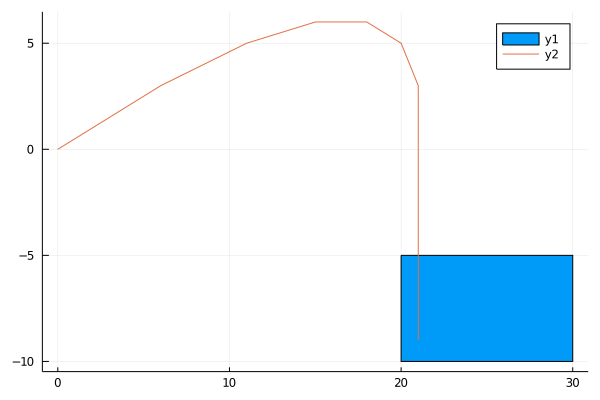

In [277]:
x = [0,0]
v = [6,3]
plotTrajectory(x,v,target)

### Find optimal trajectory

In [268]:
findOptimalVelocity(target)

[28, -11]


(45, [6, 9])

[39, 207][18, 102]


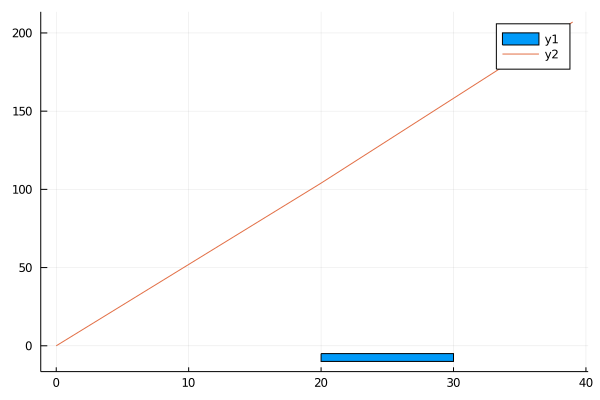

In [269]:
plotTrajectory([0,0],[20,104],target)

## Part 2

In [280]:
function findAllVelocities(target::Array{Int64,2})
    possibVel = Array{Int64}(undef,0)
    nvel =0
    
    for vx in 0:target[1,2] , vy in target[2,1]:1000
        xend,vend,apex = calculateTrajectory([0,0],[vx,vy],target)
        if !(any(xend.<target[:,1]) || any(xend.>target[:,2]))
            nvel +=1
            append!(possibVel,[vx,vy])
        end
        
    end
    return nvel, reshape(possibVel,(2,nvel))
end

findAllVelocities (generic function with 1 method)

In [285]:
nvel,posVel = findAllVelocities(target)

(3618, [20 20 … 250 250; 3 4 … -58 -57])